In [1]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
def save_regression_results_to_csv(results, data, columns, filename):
    """
    Save regression results to a CSV file.

    Parameters:
    results (statsmodels.regression.linear_model.RegressionResultsWrapper): The regression results.
    data (pandas.DataFrame): The DataFrame to save.
    columns (list of str): The columns of the DataFrame to save.
    filename (str): The name of the file to save the results to.
    """
    # Convert the regression results to a DataFrame
    results_df = pd.DataFrame({
        'coefficients': results.params,
        'standard errors': results.bse,
        't-values': results.tvalues,
        'p-values': results.pvalues,
        'conf_int_lower': results.conf_int().iloc[:, 0],
        'conf_int_upper': results.conf_int().iloc[:, 1]
    })

    # Add the specified columns from the original DataFrame
    for column in columns:
        results_df[column] = data[column]

    # Save the DataFrame to a CSV file
    results_df.to_csv(filename)

    # Save the DataFrame to a CSV file
    results_df.to_csv(filename)
# Load and clean data


In [2]:
def load_data(file_name):
    current_dir = os.getcwd()
    os.chdir(current_dir)
    data = pd.read_csv(file_name)
    # Drop rows with NaN values
    data.fillna('0')
    return data

# OLS Regression


In [3]:
df2 = load_data('/Users/anvith/Desktop/ECON 470/mergedReplicationData3.csv')

df2

,Unnamed: 0,isocode,country_x,ln_maddison_pcgdp2000,ln_export_area,ln_export_pop,colony0,colony1,colony2,colony3,...,LNYR2013,LNYR2014,LNYR2015,LNYR2016,LNYR2017,LNYR2018,LNYR2019,LNYR2020,LNYR2021,LNYR2022
0,0,AGO,Angola,6.670766,7.967493,14.399250,0,0,0,1,...,8.529388,8.519587,8.076310,7.500922,7.799497,7.840120,7.692272,7.279943,7.563966,8.006516
1,1,BDI,Burundi,6.354370,1.140843,4.451658,0,0,0,0,...,5.487067,5.552256,5.667670,5.491165,5.497764,5.446999,5.379773,5.379102,5.398876,5.556925
2,2,BEN,Benin,7.187657,8.304137,13.308970,0,0,1,0,...,7.101919,7.132102,6.948564,6.956374,6.998760,7.085431,7.065516,7.123458,7.215910,7.172310
3,3,BFA,Burkina Faso,6.748760,6.413822,11.724286,0,0,1,0,...,6.636345,6.642971,6.449090,6.500969,6.566932,6.658271,6.640176,6.713627,6.789851,6.721470
4,4,BWA,Botswana,8.377471,-2.302585,3.912023,0,1,0,0,...,8.769756,8.831132,8.677565,8.765857,8.810660,8.846183,8.808543,8.678473,8.887210,8.954012
5,5,CAF,Central African Republic,6.472346,1.171314,8.052058,0,0,1,0,...,5.864275,5.978524,5.863290,5.919258,6.027653,6.077487,6.055398,6.076424,6.133696,6.056920
6,6,CIV,Ivory Coast,7.189922,5.096793,10.843699,0,0,1,0,...,7.551215,7.661066,7.571258,7.600500,7.656026,7.738724,7.736651,7.761775,7.868399,7.818596
7,7,CMR,Cameroon,7.016610,4.944928,10.331063,0,0,1,0,...,7.351889,7.397386,7.243996,7.262675,7.299704,7.374040,7.338685,7.338973,7.411107,7.354675
8,8,COG,Congo,7.702556,5.623267,12.391068,0,0,1,0,...,8.221385,8.195281,7.806024,7.653259,7.708734,7.906637,7.827618,7.606521,7.840106,7.882022
9,9,COM,Comoros,6.364751,-2.302585,3.912023,0,0,1,0,...,7.375249,7.383174,7.187609,7.213228,7.254593,7.333897,7.320393,7.326194,7.363578,7.303098


In [26]:
import statsmodels.api as sm

# Loop over the years
for year in range(1990, 2021):
    # Define the target column
    target_column = f'LNYR{year}'

    independent_vars = [
       'ln_export_area', 'ln_export_pop','abs_latitude',
       'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area',
       'island_dum', 'islam', 'legor_fr', 'legor_uk', 'region_n', 'region_s',
       'region_w', 'region_e', 'region_c', 'ln_avg_gold_pop', 'ln_avg_oil_pop',
       'ln_avg_all_diamonds_pop', 'ln_pop_dens_1400'] + [f'colony{i}' for i in range(8)] + [f'YR{i}' for i in range(1990,2021)]
    
    coefficients = []

    # Assuming data is a string representing your file path
    data = "/Users/anvith/Desktop/ECON 470/mergedReplicationData3.csv"

    # Load the data
    df = pd.read_csv(data, usecols=[target_column,
       'ln_export_area', 'ln_export_pop','abs_latitude',
       'longitude', 'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area',
       'island_dum', 'islam', 'legor_fr', 'legor_uk', 'region_n', 'region_s',
       'region_w', 'region_e', 'region_c', 'ln_avg_gold_pop', 'ln_avg_oil_pop',
       'ln_avg_all_diamonds_pop', 'ln_pop_dens_1400'] + [f'colony{i}' for i in range(8)] + [f'YR{i}' for i in range(1990,2021)])
    
    # Define the independent and dependent variables
    X = df[independent_vars]
    y = df[target_column]
    
    # Add a constant to the independent variables matrix
    X = sm.add_constant(X)
    
    # Perform the OLS regression
    model = sm.OLS(y, X).fit()

   
    
    # Get the coefficients
    coef = model.params
    coefficients.append(coef)

# Convert the list of coefficients to a DataFrame
coefficients_df = pd.DataFrame(coefficients, columns=['const'] + independent_vars, index=range(1990, 2021))

# Save the DataFrame to a CSV file
coefficients_df.to_csv('coefficients.csv')

In [13]:
def perform_iv_first_stage(data):
    # Independent instrument variables
    instruments = ['atlantic_distance_minimum', 'indian_distance_minimum', 
                   'saharan_distance_minimum', 'red_sea_distance_minimum']
    X = data[instruments]
    y = data['ln_export_area']
    X = sm.add_constant(X) # Adding a constant term

    first_stage = sm.OLS(y, X).fit()
    data['predicted_ln_export_area'] = first_stage.predict(X) # Adding predicted values
    return first_stage, data

# Instrumental Variable Regression - Second Stage


In [19]:
first_stage = perform_iv_first_stage(df2)[0]

first_stage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         ln_export_area   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     4.545
Date:                Sun, 28 Apr 2024   Prob (F-statistic):            0.00347
Time:                        11:21:19   Log-Likelihood:                -135.48
No. Observations:                  52   AIC:                             281.0
Df Residuals:                      47   BIC:                             290.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        29.1097      6.959      4.183      0.000      15.109      43.110
atlantic_distance_minimum    -1.3140      0.357     -3.683      0.001      -2.032      -0.596
indian_distance_minimum      -1.0954      0.380     -2.884      0.006      -1.859      -0.331
saharan_distance_minimum     -2.4349      0.823     -2.958      0.005      -4.091      -0.779
red_sea_distance_minimum     -0.0019      0.710     -0.003      0.998      -1.431       1.427
==============================================================================
Omnibus:                        5.115   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                2.450
Skew:                          -0.242   Prob(JB):                        0.294
Kurtosis:                       2.054   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
def perform_iv_second_stage(data):
    X = data[['predicted_ln_export_area']]
    y = data['ln_maddison_pcgdp2000']
    X = sm.add_constant(X) # Adding a constant term

    second_stage = sm.OLS(y, X).fit()
    return second_stage

# Plotting scatter plots


In [21]:
second_stage = perform_iv_second_stage(df2)

second_stage.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     ln_maddison_pcgdp2000   R-squared:                       0.269
Model:                               OLS   Adj. R-squared:                  0.254
Method:                    Least Squares   F-statistic:                     18.36
Date:                   Sun, 28 Apr 2024   Prob (F-statistic):           8.30e-05
Time:                           11:21:49   Log-Likelihood:                -55.164
No. Observations:                     52   AIC:                             114.3
Df Residuals:                         50   BIC:                             118.2
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        7.8114      0.187     41.879      0.000       7.437       8.186
predicted_ln_export_area    -0.2079      0.049     -4.285      0.000      -0.305      -0.110
==============================================================================
Omnibus:                        2.190   Durbin-Watson:                   2.479
Prob(Omnibus):                  0.334   Jarque-Bera (JB):                1.552
Skew:                           0.416   Prob(JB):                        0.460
Kurtosis:                       3.155   Cond. No.                         7.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
def plot_scatter(data, x_var, y_var, title, file_name):
    plt.figure(figsize=(8, 6))
    sns.regplot(x=x_var, y=y_var, data=data)
    plt.title(title)
    plt.savefig(file_name)

# Saving regression summary and summary statistics
def print_summary(model, data, independent_vars):
    summary = model.summary().as_text()
    summary_stats = data[independent_vars].describe().to_string()
    print(summary + '\n\nSummary Statistics:\n' + summary_stats)
        



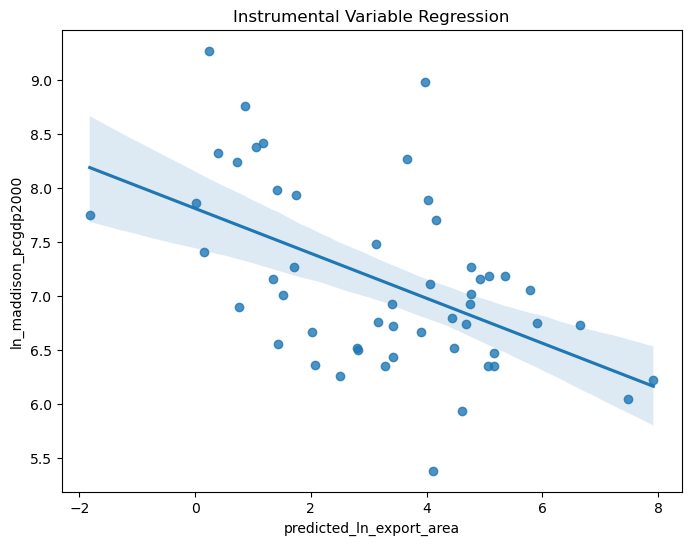

In [23]:
plot_scatter(df2, 'predicted_ln_export_area', 'ln_maddison_pcgdp2000', 'Instrumental Variable Regression', 'iv_regression.png')

In [24]:
print_summary(second_stage, df2, ['predicted_ln_export_area'])

                              OLS Regression Results                             
Dep. Variable:     ln_maddison_pcgdp2000   R-squared:                       0.269
Model:                               OLS   Adj. R-squared:                  0.254
Method:                    Least Squares   F-statistic:                     18.36
Date:                   Sun, 28 Apr 2024   Prob (F-statistic):           8.30e-05
Time:                           11:22:36   Log-Likelihood:                -55.164
No. Observations:                     52   AIC:                             114.3
Df Residuals:                         50   BIC:                             118.2
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------

In [39]:

from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
def doubleLasso(df, target_column, independent_vars):
    # Extracting the independent variables (X) and the dependent variable (y) from the DataFrame
    X = df[independent_vars].values
    y = df[target_column].values

    # Scaling features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # First Lasso: Variable selection
    lasso1 = LassoCV(cv=10, random_state=42,eps=0.001).fit(X_train, y_train)
    selected_features = np.where(lasso1.coef_ != 0)[0]

    # Extracting the selected features for the second Lasso
    X_train_selected = X_train[:, selected_features]
    X_test_selected = X_test[:, selected_features]

    # Second Lasso: Estimation using selected features
    lasso2 = LassoCV(cv=10, random_state=42).fit(X_train_selected, y_train)

    # Printing selected features and their coefficients
    # Convert the NumPy array to a list

    selected_features_list = selected_features.tolist()
    
    # Use the list to index independent_vars
    print(f"Selected Features: {[independent_vars[i] for i in selected_features_list]}")
    # Create a dictionary that maps each selected feature to its coefficient
    
    coef_dict = dict(zip([independent_vars[i] for i in selected_features_list], lasso2.coef_))
    
    return coef_dict


In [43]:
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

# Define your independent variables
independent_vars = np.array(['ln_export_area',
       'ln_export_pop', 'abs_latitude', 'longitude',
       'rain_min', 'humid_max', 'low_temp', 'ln_coastline_area', 'island_dum',
       'islam', 'legor_fr', 'legor_uk', 'region_n', 'region_s', 'region_w',
       'region_e', 'region_c', 'ln_avg_gold_pop', 'ln_avg_oil_pop',
       'ln_avg_all_diamonds_pop', 'ln_pop_dens_1400','ln_avg_all_diamonds_pop', 'ln_pop_dens_1400',
       'atlantic_distance_minimum', 'indian_distance_minimum',
       'saharan_distance_minimum', 'red_sea_distance_minimum',
       'LN_GDPPC$_2021'] + [f'colony{i}' for i in range(8)] + [f'YR{i}' for i in range(1990,2021)])

# Define your data file
data = 'mergedReplicationData3.csv'

# Initialize an empty list to store the coefficients
coefficients = []
# Loop over the years
for year in range(1990, 2021):
    # Define the target column
    target_column = f'LNYR{year}'

    # Load the data
    df = pd.read_csv(data, usecols=[target_column] + list(independent_vars))
    coef = doubleLasso(df, target_column, independent_vars)
    coefficients.append(coef)

# Convert the list of coefficients to a DataFrame
coefficients_df = pd.DataFrame(coefficients, columns=independent_vars, index=range(1990, 2021))

# Save the DataFrame to a CSV file
coefficients_df.to_csv('coefficients_lasso.csv')

/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.177e-03, tolerance: 3.742e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.905e-03, tolerance: 3.742e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_pop_dens_1400', 'ln_pop_dens_1400', 'YR1990']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.193e-03, tolerance: 3.254e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.453e-03, tolerance: 3.254e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_pop_dens_1400', 'YR1991', 'YR1995']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.114e-03, tolerance: 3.920e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.707e-03, tolerance: 3.920e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'ln_pop_dens_1400', 'indian_distance_minimum', 'colony2', 'colony4', 'YR1992', 'YR1996']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.766e-03, tolerance: 3.729e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.515e-03, tolerance: 3.729e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'islam', 'region_e', 'ln_pop_dens_1400', 'ln_pop_dens_1400', 'indian_distance_minimum', 'red_sea_distance_minimum', 'colony2', 'colony4', 'colony5', 'YR1993', 'YR1996']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.768e-03, tolerance: 4.639e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.798e-03, tolerance: 4.238e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'islam', 'ln_pop_dens_1400', 'ln_pop_dens_1400', 'indian_distance_minimum', 'red_sea_distance_minimum', 'colony4', 'colony5', 'YR1991', 'YR1995', 'YR1996']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.970e-03, tolerance: 3.906e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.479e-03, tolerance: 4.183e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'longitude', 'islam', 'indian_distance_minimum', 'red_sea_distance_minimum', 'colony4', 'colony5', 'YR1996']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.786e-03, tolerance: 3.767e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.861e-03, tolerance: 3.767e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'ln_avg_oil_pop', 'indian_distance_minimum', 'red_sea_distance_minimum', 'colony4', 'YR1996']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.197e-02, tolerance: 3.931e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.385e-02, tolerance: 3.931e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'region_e', 'ln_avg_oil_pop', 'red_sea_distance_minimum', 'colony4', 'YR1996']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.109e-02, tolerance: 3.904e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.111e-02, tolerance: 3.904e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'indian_distance_minimum', 'colony4', 'YR1996']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.056e-03, tolerance: 4.205e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.802e-02, tolerance: 4.205e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'indian_distance_minimum', 'red_sea_distance_minimum', 'LN_GDPPC$_2021', 'colony4', 'YR1996', 'YR2009']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.462e-03, tolerance: 4.097e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.191e-03, tolerance: 4.097e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'ln_coastline_area', 'region_n', 'region_c', 'ln_avg_gold_pop', 'ln_avg_oil_pop', 'ln_pop_dens_1400', 'ln_pop_dens_1400', 'indian_distance_minimum', 'LN_GDPPC$_2021', 'colony0', 'colony4', 'YR1996', 'YR2010']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.226e-03, tolerance: 3.792e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.752e-03, tolerance: 3.792e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'region_n', 'ln_avg_oil_pop', 'LN_GDPPC$_2021', 'colony0', 'colony4', 'YR1996', 'YR2003', 'YR2009', 'YR2010']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.529e-03, tolerance: 4.044e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.054e-03, tolerance: 4.044e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'ln_avg_oil_pop', 'LN_GDPPC$_2021', 'colony0', 'colony4', 'YR1996', 'YR2003', 'YR2009']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.849e-03, tolerance: 4.515e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.821e-03, tolerance: 4.515e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'ln_avg_oil_pop', 'LN_GDPPC$_2021', 'colony0', 'colony4', 'YR1996', 'YR2003', 'YR2010']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.091e-02, tolerance: 4.411e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.322e-02, tolerance: 4.411e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'ln_avg_oil_pop', 'LN_GDPPC$_2021', 'colony0', 'colony4', 'YR2003', 'YR2010', 'YR2011']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.830e-03, tolerance: 5.072e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.508e-03, tolerance: 4.952e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'ln_avg_oil_pop', 'ln_pop_dens_1400', 'ln_pop_dens_1400', 'colony0', 'colony4', 'YR1996', 'YR2003', 'YR2010', 'YR2011']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.128e-02, tolerance: 4.990e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.083e-02, tolerance: 4.990e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'ln_avg_oil_pop', 'LN_GDPPC$_2021', 'colony0', 'colony4', 'YR2003', 'YR2010']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.019e-02, tolerance: 5.048e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.695e-03, tolerance: 5.048e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_avg_oil_pop', 'LN_GDPPC$_2021', 'colony0', 'colony4', 'YR2003', 'YR2010']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.026e-03, tolerance: 4.896e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.699e-02, tolerance: 4.896e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'longitude', 'ln_coastline_area', 'islam', 'region_s', 'ln_avg_gold_pop', 'ln_avg_oil_pop', 'ln_pop_dens_1400', 'ln_pop_dens_1400', 'colony0', 'colony1', 'colony3', 'colony4', 'colony5', 'YR2010', 'YR2011']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.712e-03, tolerance: 4.139e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.210e-02, tolerance: 4.139e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_avg_oil_pop', 'LN_GDPPC$_2021', 'colony0', 'colony4', 'YR2009', 'YR2010']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.250e-02, tolerance: 4.347e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.675e-03, tolerance: 4.531e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'ln_avg_oil_pop', 'LN_GDPPC$_2021', 'colony0', 'colony4', 'YR1996', 'YR2010']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.650e-03, tolerance: 4.169e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.055e-02, tolerance: 4.169e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'longitude', 'islam', 'ln_avg_oil_pop', 'ln_pop_dens_1400', 'ln_pop_dens_1400', 'LN_GDPPC$_2021', 'colony0', 'colony1', 'colony3', 'colony4', 'colony5', 'colony7', 'YR2011']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.578e-03, tolerance: 4.346e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.108e-02, tolerance: 4.346e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'ln_avg_oil_pop', 'ln_pop_dens_1400', 'LN_GDPPC$_2021', 'colony0', 'colony4', 'YR2010']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.645e-03, tolerance: 4.500e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.484e-03, tolerance: 4.500e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'longitude', 'ln_avg_oil_pop', 'indian_distance_minimum', 'red_sea_distance_minimum', 'LN_GDPPC$_2021', 'colony0', 'colony3', 'colony4', 'YR2013']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.129e-03, tolerance: 4.085e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.602e-03, tolerance: 4.085e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'longitude', 'ln_avg_oil_pop', 'red_sea_distance_minimum', 'LN_GDPPC$_2021', 'colony0', 'colony3', 'colony4', 'YR2014']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.455e-03, tolerance: 3.589e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.701e-03, tolerance: 3.589e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'humid_max', 'ln_avg_oil_pop', 'LN_GDPPC$_2021', 'colony4', 'YR2014', 'YR2017']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.030e-03, tolerance: 3.642e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.564e-03, tolerance: 3.642e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'humid_max', 'ln_avg_oil_pop', 'indian_distance_minimum', 'LN_GDPPC$_2021', 'colony4', 'YR2017', 'YR2020']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.045e-03, tolerance: 3.816e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.444e-03, tolerance: 3.816e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'humid_max', 'ln_avg_oil_pop', 'indian_distance_minimum', 'LN_GDPPC$_2021', 'colony4', 'YR2017']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.865e-03, tolerance: 3.898e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.580e-03, tolerance: 3.898e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'longitude', 'low_temp', 'ln_avg_gold_pop', 'ln_avg_oil_pop', 'ln_avg_all_diamonds_pop', 'ln_pop_dens_1400', 'ln_avg_all_diamonds_pop', 'ln_pop_dens_1400', 'LN_GDPPC$_2021', 'colony0', 'colony4', 'YR2020']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.560e-03, tolerance: 3.731e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.876e-03, tolerance: 3.731e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'longitude', 'ln_avg_oil_pop', 'ln_pop_dens_1400', 'ln_pop_dens_1400', 'indian_distance_minimum', 'LN_GDPPC$_2021', 'colony0', 'colony4', 'YR2020']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.589e-03, tolerance: 3.280e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.489e-03, tolerance: 3.280e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

Selected Features: ['ln_export_area', 'ln_avg_oil_pop', 'indian_distance_minimum', 'LN_GDPPC$_2021', 'colony4', 'YR2020']


/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.064e-03, tolerance: 2.913e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.045e-03, tolerance: 2.913e-03
  model = cd_fast.enet_coordinate_descent(
/Users/anvith/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe